# <font color='voilet' size = 10>Task 1</font>

## <font color='red'>Prediction using Supervised ML for the percentage of an student based on the number of study hours >> </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Task1.txt")
df.sample(5)

,Hours,Scores
14,1.1,17
12,4.5,41
16,2.5,30
19,7.4,69
6,9.2,88


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

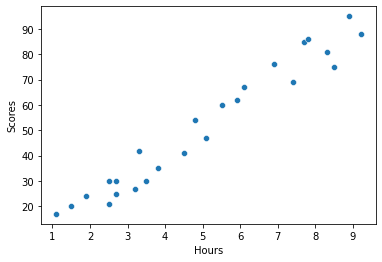

In [7]:
sns.scatterplot(df['Hours'],df['Scores'])

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

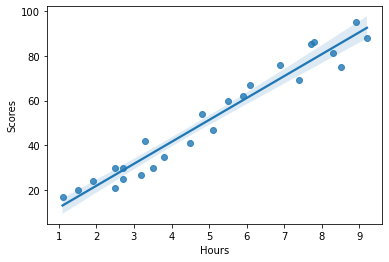

In [8]:
sns.regplot(df['Hours'],df['Scores'])

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# <font color='red' size= 5>Training Model >> </font>

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [11]:
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

In [12]:
pred_y = lr.predict(val_X)

In [13]:
pred_y

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [14]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks':pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


<AxesSubplot:xlabel='Actual Marks', ylabel='Predicted Marks'>

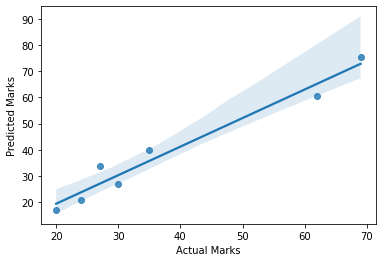

In [15]:
sns.regplot(compare_scores['Actual Marks'], compare_scores['Predicted Marks'])

# <font color='red' size= 5>Evaluating Model</font>

In [17]:
# Calculating that accuracy of the model
print('Mean absolute error: ', mean_absolute_error(val_y, pred_y))

Mean absolute error:  4.130879918502486


# <font color='red'>What will be the predicted score if student studies for 9.25 hours a day?</font>

In [18]:
hours = [9.25]
answer = lr.predict([hours])

In [19]:
print('Scores = {}'.format(round(answer[0],3)))

Scores = 93.893
